In [ ]:
#Logistic Regression on Titanic dataset & Do the Feature Enginerring.   
#BY-RAVINDER SINGH

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [245]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [246]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [247]:
x_test=test
x_test.

SyntaxError: invalid syntax (<ipython-input-247-f3469da362e1>, line 2)

In [248]:
final=pd.concat([train,test])

In [249]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [250]:
# Age has 177 missing values
# Cabin has 687 missing values

In [251]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [252]:
final.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [253]:
final.dropna(subset=['Survived'],inplace=True)

In [254]:
final.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
886,27.0,NaN,S,13.00,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536
887,19.0,B42,S,30.00,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053
888,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607
889,26.0,C148,C,30.00,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369
890,32.0,NaN,Q,7.75,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376


In [255]:
# Append a new column which tells that if a passenger has cabin or not
final['Has_cabin']=final['Cabin'].notnull().astype(int)

In [256]:
# Adding a column in dataset which will contain Title of every passenger name
def add_title(name):
    pat_1=re.compile(r'Mr')
    pat_2=re.compile(r'Mrs')
    pat_3=re.compile(r'Miss')
    pat_4=re.compile(r'Master')
    for i in range(0,891):
        str=name[i].split(',')
        if(pat_2.search(str[1])):
            name[i]='Mrs'
        elif(pat_1.search(str[1])):
            name[i]='Mr'
        elif(pat_3.search(str[1])):
            name[i]='Miss'
        elif(pat_4.search(str[1])):
            name[i]='Master'
        else:
            name[i]='Special'
        
        
final['Title']=final['Name']
np.apply_along_axis(add_title,0,final['Title'])
    

array(None, dtype=object)

In [257]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr


In [258]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Has_cabin      891 non-null int32
Title          891 non-null object
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 100.9+ KB


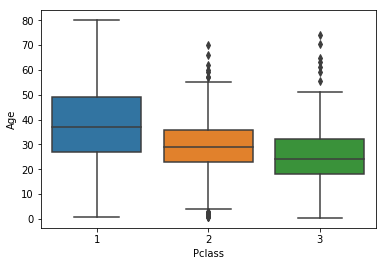

In [259]:
sns.boxplot(x='Pclass',y='Age',data=final)

In [260]:
final['Title'].value_counts()

Mr         518
Miss       180
Mrs        129
Master      40
Special     24
Name: Title, dtype: int64

In [261]:
final['Age']=final['Age'].fillna(final['Age'].mean())

In [262]:
final['Embarked']=final['Embarked'].fillna('S')

In [263]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
Age            891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Has_cabin      891 non-null int32
Title          891 non-null object
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 140.9+ KB


In [264]:
final.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Has_cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.228956
std,13.002015,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,0.420397
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,29.699118,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,0.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,1.000000


In [265]:
final['Categorical_Age']=pd.qcut(final['Age'],4,labels=['A','B','C','D'])


In [266]:
final['Categorical_Age'].value_counts()

B    330
A    231
D    217
C    113
Name: Categorical_Age, dtype: int64

In [267]:
final['Categorical_Fare']=pd.qcut(final['Fare'],5,labels=['LC','LM','M','UM','U'])

In [268]:
final['Categorical_Fare'].value_counts()

LM    184
UM    180
LC    179
U     176
M     172
Name: Categorical_Fare, dtype: int64

In [269]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title,Categorical_Age,Categorical_Fare
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr,A,LC
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,D,U
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,B,LM
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,C,U
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,C,LM


In [270]:
final=final.drop(labels=['Cabin','Name','Parch','PassengerId','Ticket','Age','Fare','SibSp'],axis=1)

In [271]:
final.head()

,Embarked,Pclass,Sex,Survived,Has_cabin,Title,Categorical_Age,Categorical_Fare
0,S,3,male,0.0,0,Mr,A,LC
1,C,1,female,1.0,1,Mrs,D,U
2,S,3,female,1.0,0,Miss,B,LM
3,S,1,female,1.0,1,Mrs,C,U
4,S,3,male,0.0,0,Mr,C,LM


In [272]:
final=pd.get_dummies(final,columns=['Sex'],drop_first=True)

In [273]:
final=pd.get_dummies(final,columns=['Title'],drop_first=True)

In [274]:
final=pd.get_dummies(final,columns=['Categorical_Fare'],drop_first=True)

In [275]:
final=pd.get_dummies(final,columns=['Embarked'],drop_first=True)

In [276]:
final=pd.get_dummies(final,columns=['Categorical_Age'],drop_first=True)

In [277]:
final.head()

,Pclass,Survived,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
0,3,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,1.0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,1,1.0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,3,0.0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [278]:
final.shape

(891, 17)

In [279]:
final['Survived'] = final.Survived.apply(lambda x: int(x))

In [280]:
final.head()

,Pclass,Survived,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
0,3,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [281]:
y=final['Survived']
x=final
x.drop(labels=['Survived'],axis=1,inplace=True)

In [282]:
x.shape

(891, 16)

In [283]:
y.shape

(891,)

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [285]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 16)
(712,)
(179, 16)
(179,)


In [286]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [287]:
y_pred = classifier.predict(X_test)

In [288]:
score = classifier.score(X_test, y_test)
print(score)

0.8100558659217877
